# MendelPlots.jl

MendelPlots.jl is a Julia package for creating plots for genome-wide association studies (GWAS) results. The package can currently create Manhattan Plots and QQ Plots for GWAS data, specifically catered to the data files created from [*OpenMendel*](https://github.com/OpenMendel) software packages [MendelGWAS](https://github.com/OpenMendel/MendelGWAS.jl) and [PolrGWAS](https://github.com/OpenMendel/PolrGWAS.jl). The input needed is a dataframe (see [DataFrames.jl](https://github.com/JuliaData/DataFrames.jl)) or individual features as arrays.

MendelPlots.jl uses [Gadfly](https://github.com/GiovineItalia/Gadfly.jl) as the backend for plotting and saves the plots as .png files. 


# Installation
This package requires Julia v0.7.0 or later. The package has not yet been registered and must be installed using the repository location. Start julia and use the `]` key to switch to the package manager REPL and proceed as follows:
```julia
(v1.5) pkg> add https://github.com/OpenMendel/MendelPlots.jl.git
```

In [1]:
# machine information for this tutorial
versioninfo()

Julia Version 1.5.2
Commit 539f3ce943 (2020-09-23 23:17 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin18.7.0)
  CPU: Intel(R) Core(TM) i7-4850HQ CPU @ 2.30GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-9.0.1 (ORCJIT, haswell)
Environment:
  JULIA_NUM_THREADS = 4


For use in this tutorial, we will load the following packages:

In [ ]:
using TextParse, DataFrames, MendelPlots

## Example dataset

The `data` folder of the package in test contains an example simulated data set. In this tutorial, we use relative path `../data`. In general, the user can locate this folder by the following command:
```julia
import MendelPlots
joinpath(dirname(pathof(MendelPlots)), "../test/data")
```

In [3]:
;ls -l ../test/data

total 832
-rw-r--r--  1 christophergerman  staff  424332 Jan 24 00:05 gwasresults.txt


## Basic usage

The following commands can be used to load the test dataset into a dataframe to be used to create plots. 

In [6]:
data, colnames = csvread("../test/data/gwasresults.txt", ',', header_exists = true)
df = DataFrame([i for i in data], Symbol.(colnames))

,pval,chr,pos,gene
,Float64,Int64,Int64,String
1,0.434119,1,1,
2,0.61908,1,2,
3,0.909921,1,3,
4,0.0419107,1,4,
5,0.344776,1,5,
6,0.308763,1,6,
7,0.687524,1,7,
8,0.0716104,1,8,
9,0.882899,1,9,


The basic commands for MendelPlots.jl are 
    
```julia
qq()
manhattan()
``` 

## QQ Plots

The following command creates a qq plot from the data

In [7]:
qq(df)

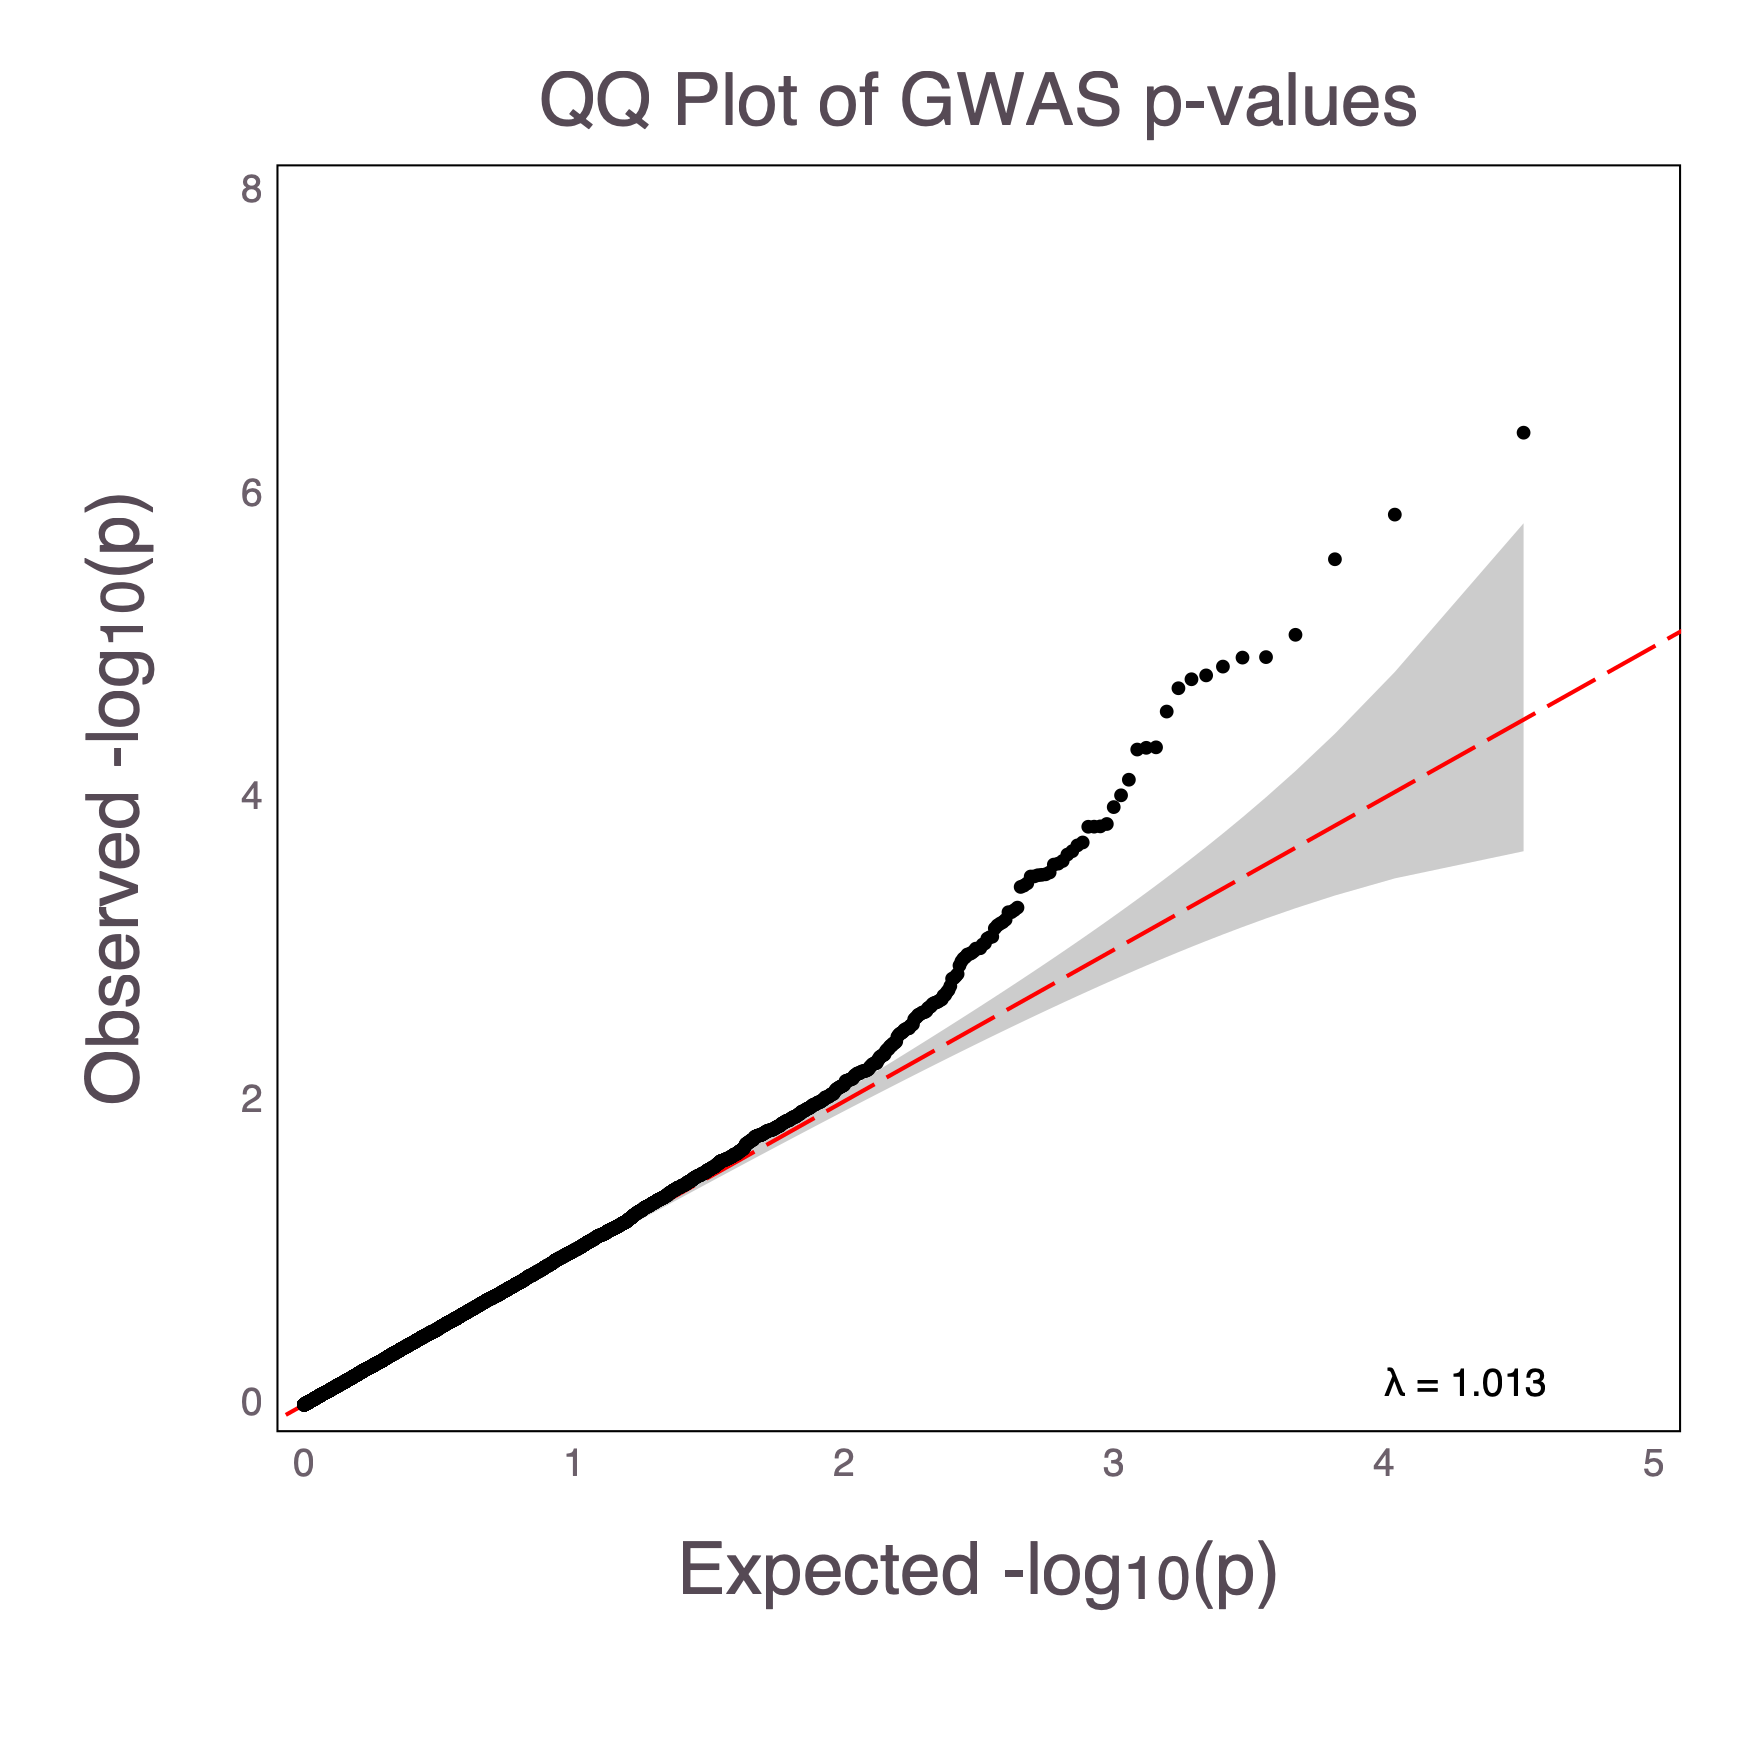

In [8]:
display("image/png", read("qqplot.png"))

For documentation of the `qq` function, type `?qq` in Julia REPL.
```@docs
qq
```

## Manhattan Plots

The following command creates a manhattan plot from the data

In [9]:
manhattan(df)

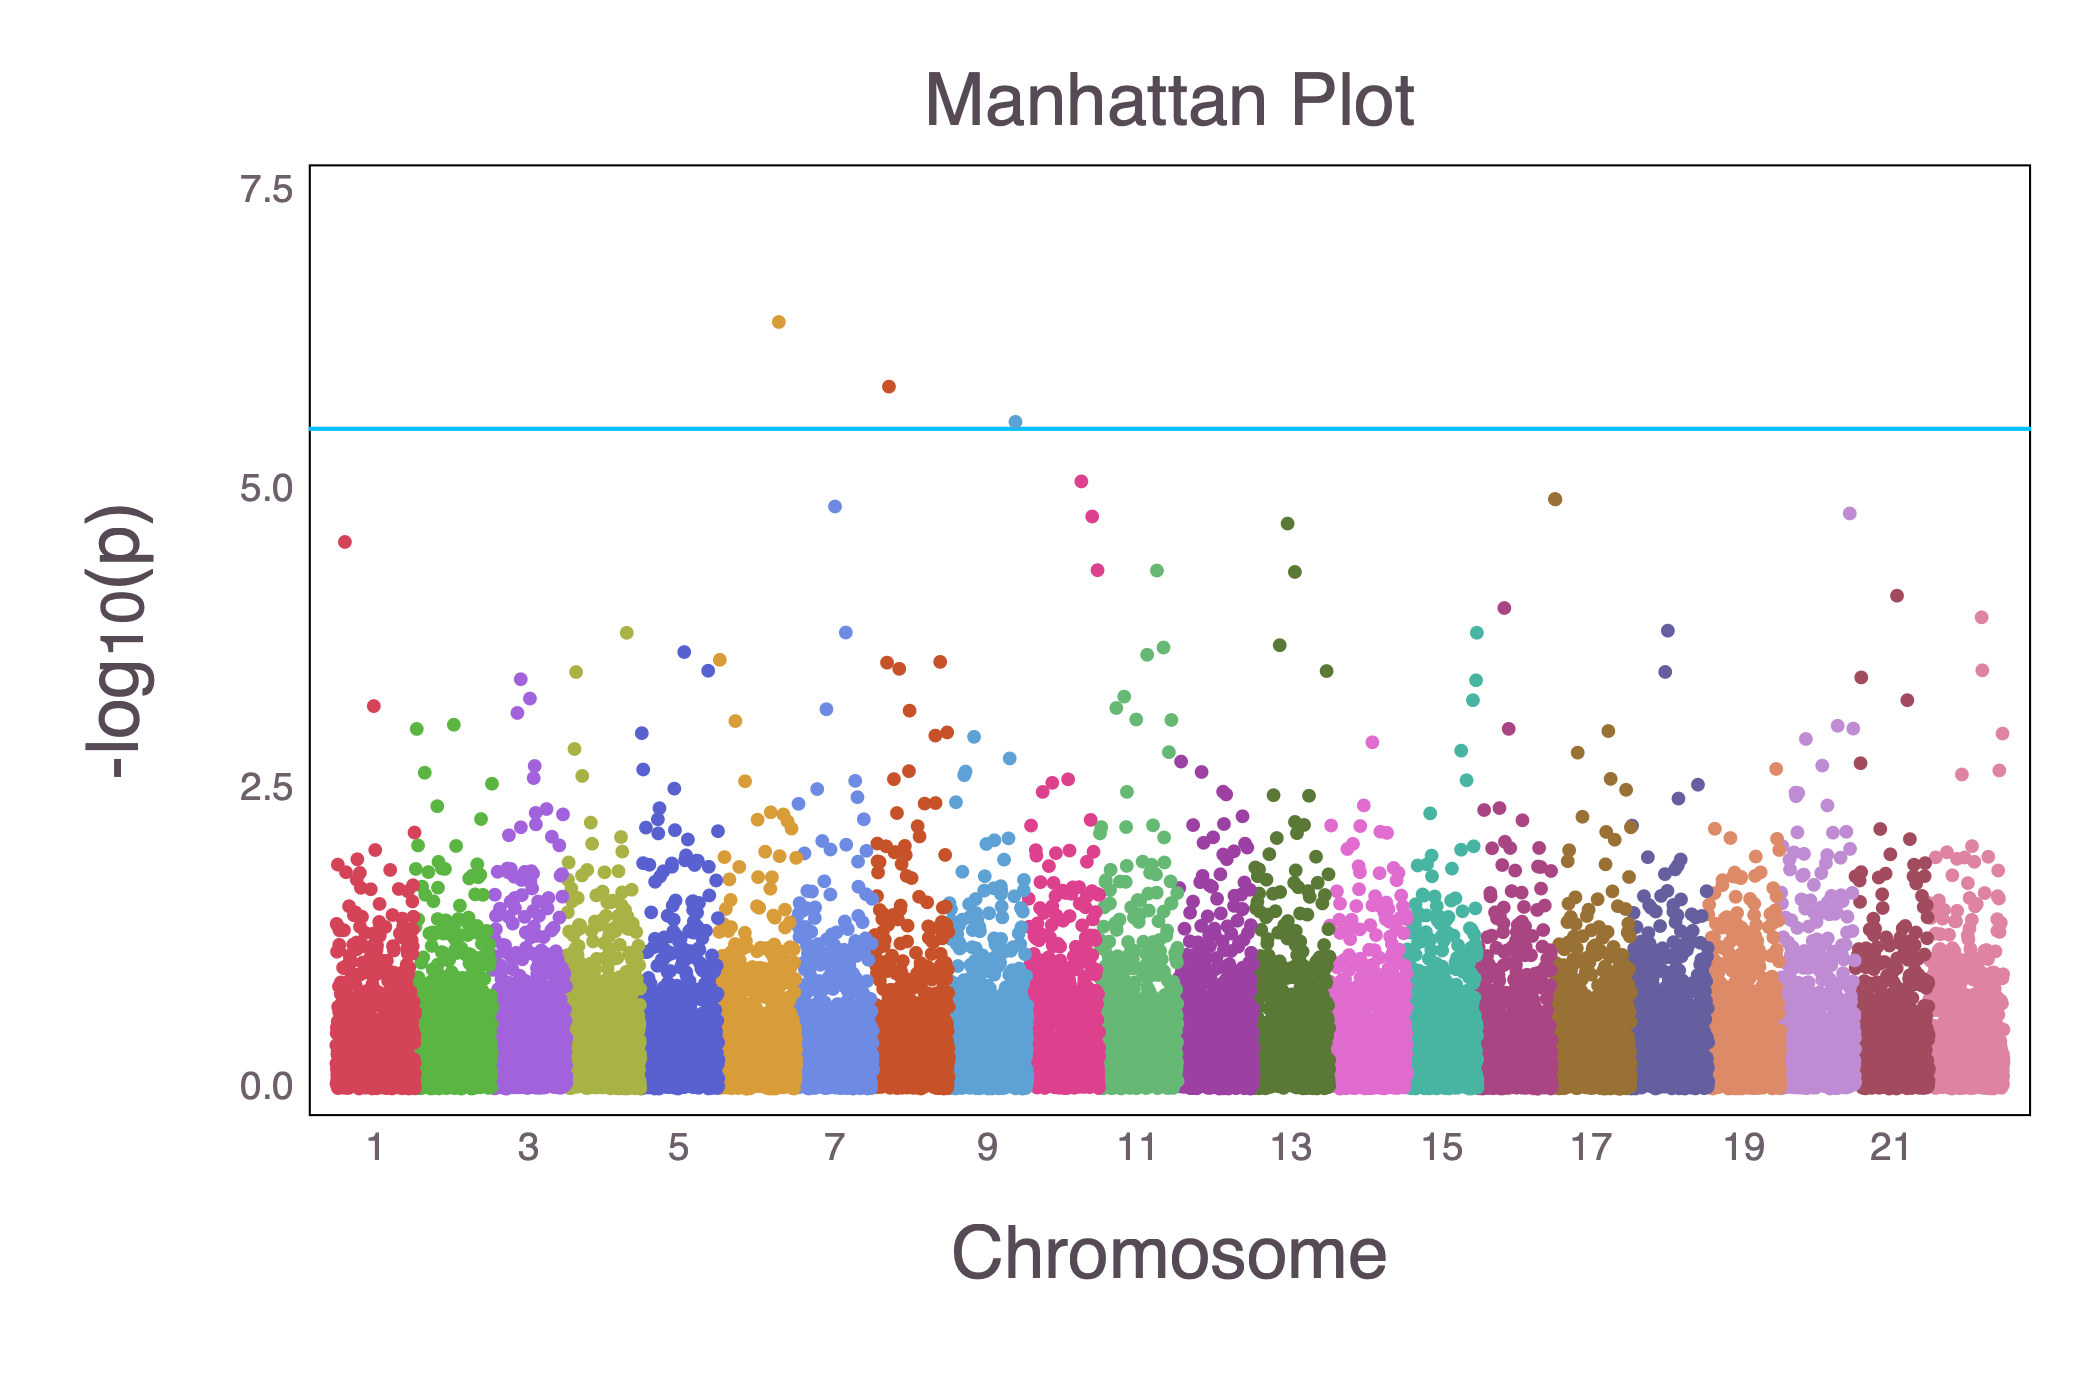

In [10]:
display("image/png", read("manhattan.png"))

For documentation of the `manhattan` function, type `?manhattan` in Julia REPL.
```@docs
manhattan
```

### Necessary Inputs

`qq` expects either an DataFrame object input or an array of pvalues as an input. If a DataFrame is the input, the pvalues either must be stored under the name pval or you must use the `pvalvar` argument to the specify the variable name in the dataframe that corresponds to pvalue. 

`manhattan` expects either an DataFrame object input or an array of pvalues and an array of chromosome IDs as an input. If a DataFrame is the input, the pvalues either must be stored under the name pval or you must use the `pvalvar` argument to the specify the variable name in the dataframe that corresponds to pvalue. The chromosomes and pvalues must correspond in order to each other, and must be ordered in according to ascending basepairs. The chromosome variable must either be named `chr` or the chromosome variable name must be specified using the `chrvar` argument. Optionally, if you have basepair location information in your DataFrame, the position variable must either be named `pos` or the BP position variable name must be specified using the `posvar` argument, but the basepair position isn't required to create a create a Manhattan plot. 

### Annotated Genes

Gene annotations may be displayed in the Manhattan plot if the information is available in the dataframe object. The annotation variable name can be specified with `annotatevar`. By default is it assumed to be `:gene`. The indicies (corresponding to the results dataframe) must be specified for annotations to be applied using the `annotateinds` option. For example, the top hits are the indicies (4380, 5470, 6722, 7374, 12061, 4936, 14978, 7481), so we can use those to annotate the Manhattan plot with their gene labels.

In [11]:
manhattan(df;  
    annotateinds = [4380
    5470
    6722
    7374
   12061
    4936
   14978
    7481],
    titles = "Annotated Manhattan Plot", dpi = 300, 
    outfile = "annotated_manhattan.png")

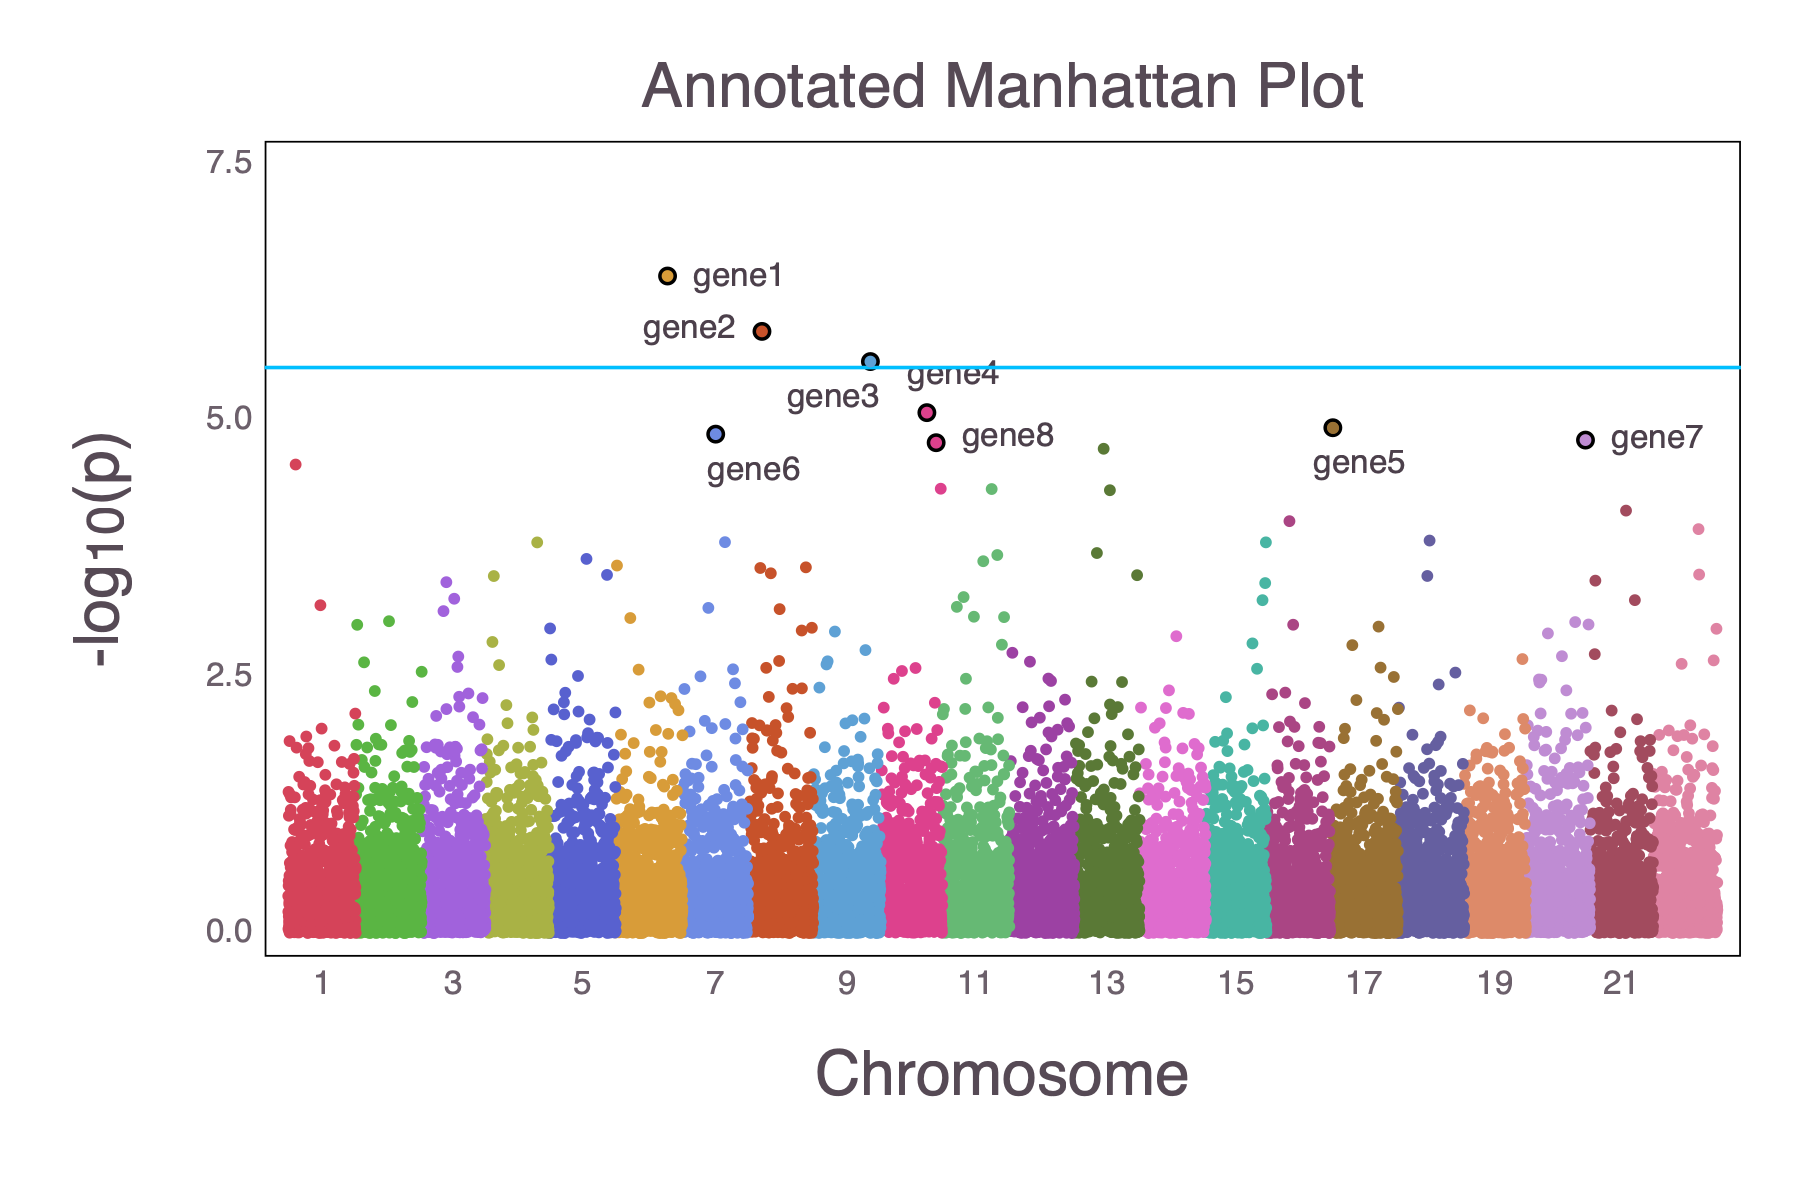

In [12]:
display("image/png", read("annotated_manhattan.png"))

### Additional Options

There are several other options that the `qq` and `manhattan` functions take, refer to the specific documentation for each function via the `?` command to see the option names. Current options include arguments for qq line color, qq dot color, maximum x and y values, dpi, significance line y-value, significance line color, title, fontsize, and dataframe names of pvalues, chromosomes, and BP positions in your input dataframe. 

You can utilize more options to create a more customized plot. 

In [15]:
qq(df[!, :pval]; xlabel = "Expected", ylabel = "Observed", 
    titles = "", outfile = "testqq.png", dotcolor = "gray", 
    fontsize = 18pt, linecolor = "blue")

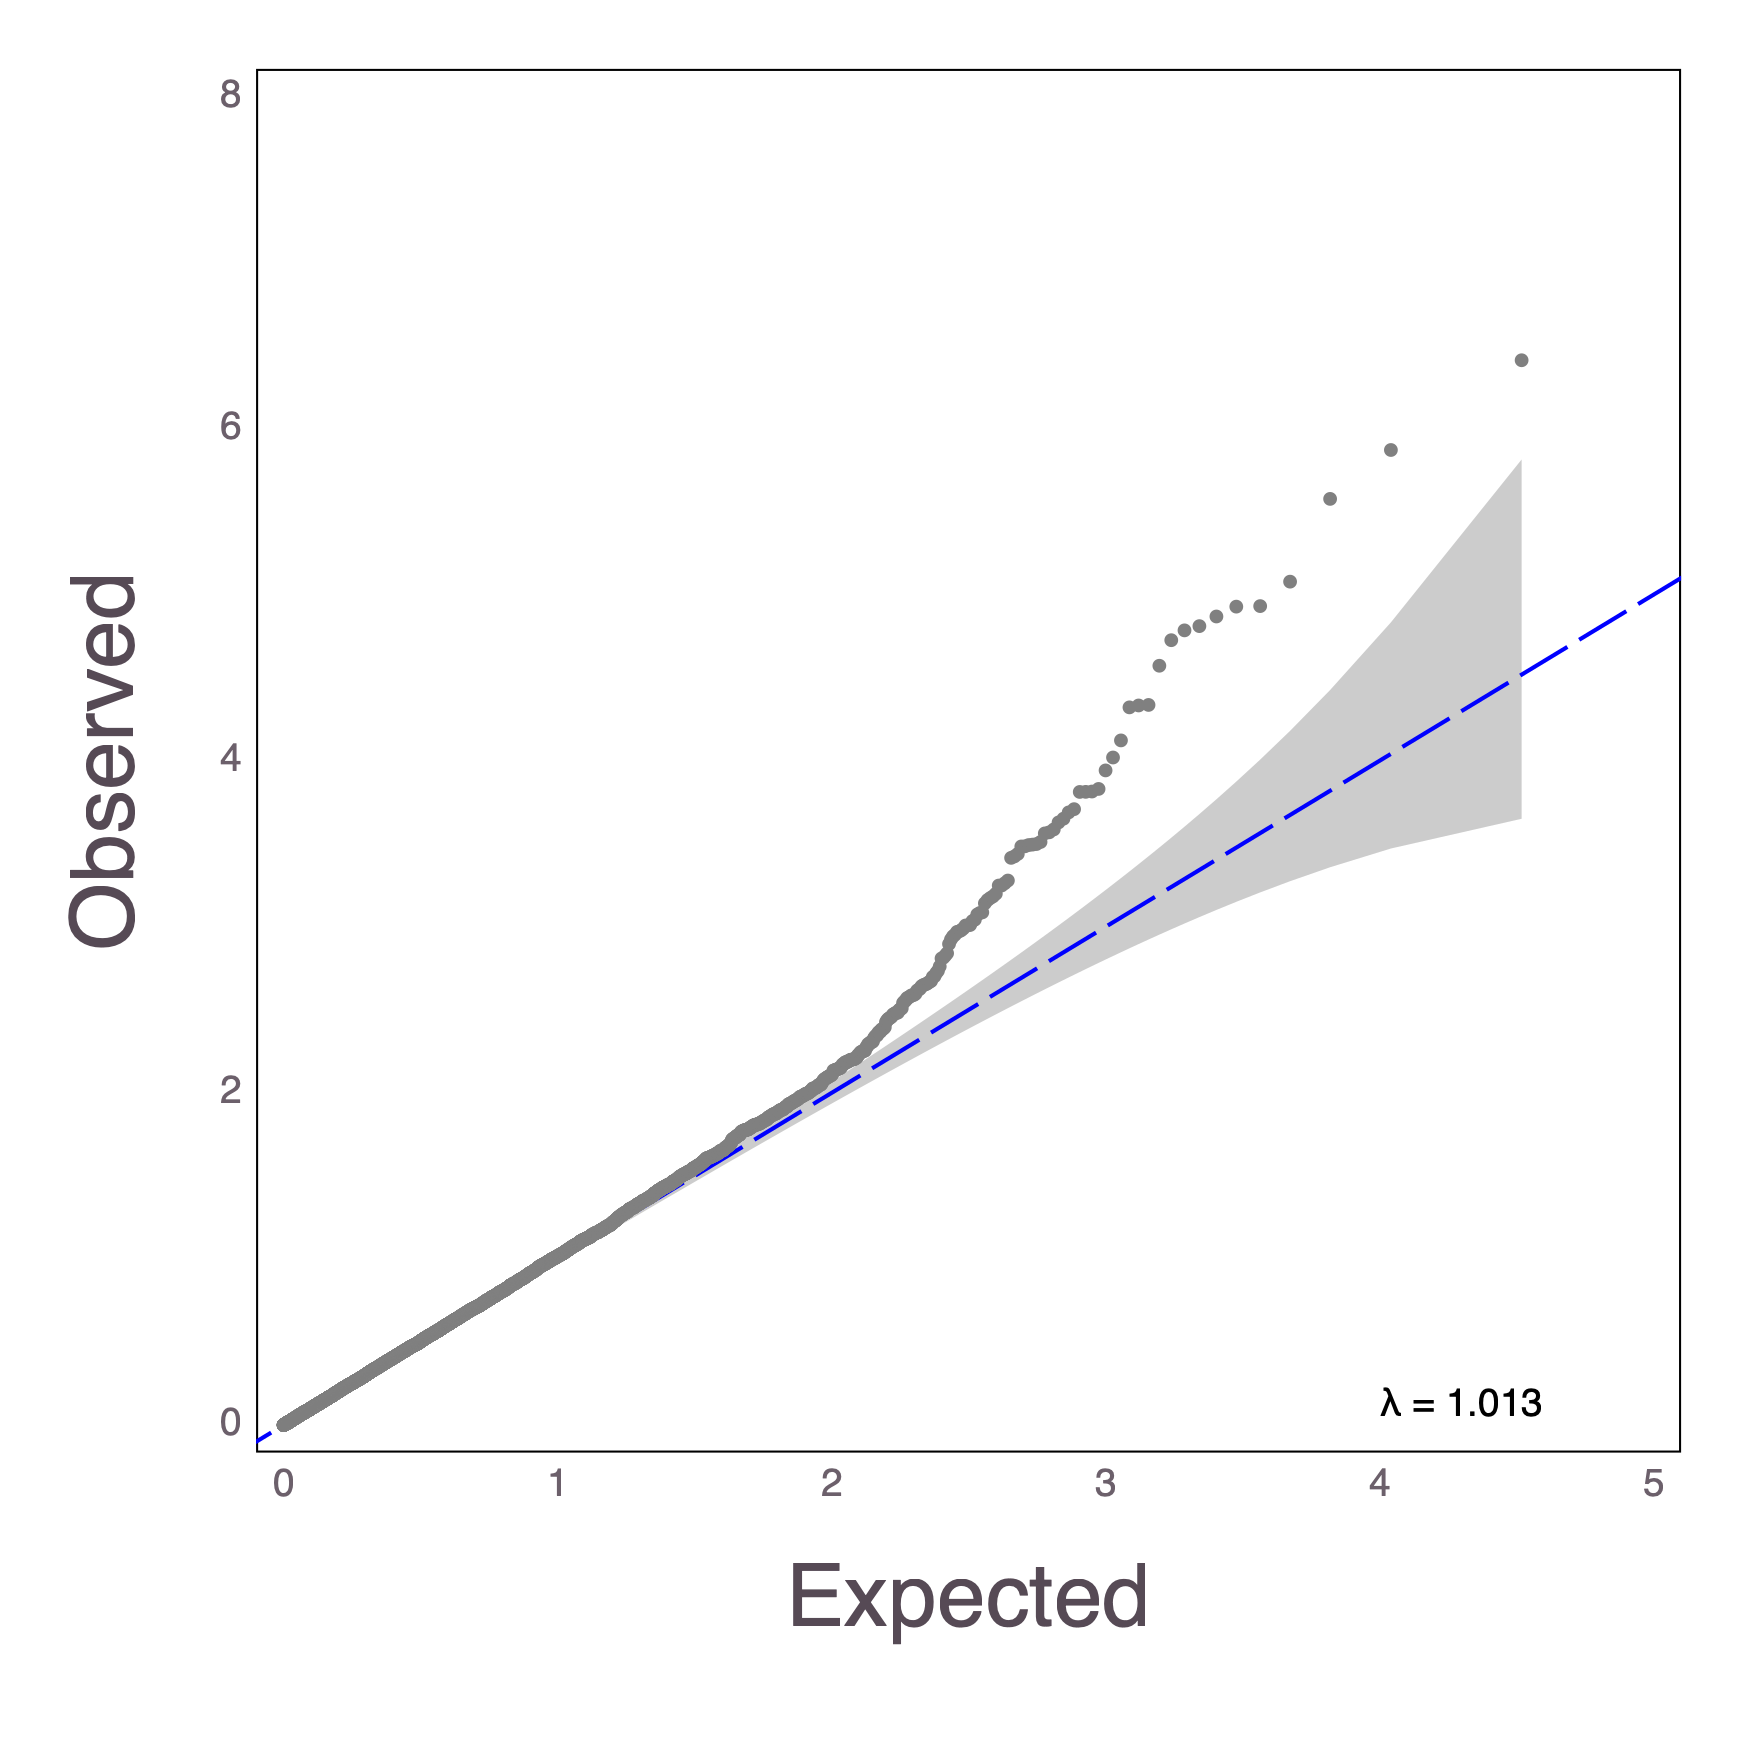

In [16]:
display("image/png", read("testqq.png"))

In [17]:
manhattan(df; pvalvar = "pval", chrvar = "chr", 
    posvar = "pos", outfile = "manhattan2.pdf", fontsize = 18pt, linecolor = "red")

## Saving Files

`qq`, by default, outputs a .png named qqplot.png. Use the keyword argument 'outfile' to change the output file name. It will parse the output file name to ensure that the extension is compatible. Currently, we support .png, .pdf, and .svg files. 

`manhattan` by default, outputs a .png named manhattan.png. Use the keyword argument 'outfile' to change the output file name. It will parse the output file name to ensure that the extension is compatible. Currently, we support .png, .pdf, and .svg files. 